<a href="https://colab.research.google.com/github/amirsinafarajollahi/INSE6220-final-project/blob/main/amirsinafarajollahiINSE6220project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis and diagnosis of Breast cancer**

**Install Pycaret**

In [1]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 21.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 83.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.0 MB/s 

**Import Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


**Dataset**

The “Breast Cancer diagnosis Data Set” used for Principle Component Analysis (PCA) and classification models is obtained from Kaggle. The data set provided information about tumor attributes to diagnosed it as benign or malignant for breast cancer.

There are 5 attributes with 569 entries and one column for classification.
**0 represents Benign and 1 represents Malignant.**


All attributes are numerical and they are listed bellow:

1. mean_radius = MR
2. mean_texture = MT
3. mean_perimeter = MP
4. mean_area = MA
5. mean_smoothness = MS
6. diagnosis (Label)

The original dataset can be found on below link:
https://www.kaggle.com/datasets/theodoravalerie/breast-cancer-data





In [4]:
#read cvs file into dataframe
df = pd.read_csv('/content/Automobile.csv')
df.head(5)

H      F     E     W    S  R
0  288  13.50  2030  4544  320  3
1  184  11.20  3040  5015  315  3
2  182   6.56  2090  4563  227  3
3  184   9.80  3080  5265  296  3
4  207   7.04  1940  3780  241  2

In [5]:
len(df.index)

205

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   H       205 non-null    int64  
 1   F       205 non-null    float64
 2   E       205 non-null    int64  
 3   W       205 non-null    int64  
 4   S       205 non-null    int64  
 5   R       205 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.7 KB


In [7]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [8]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

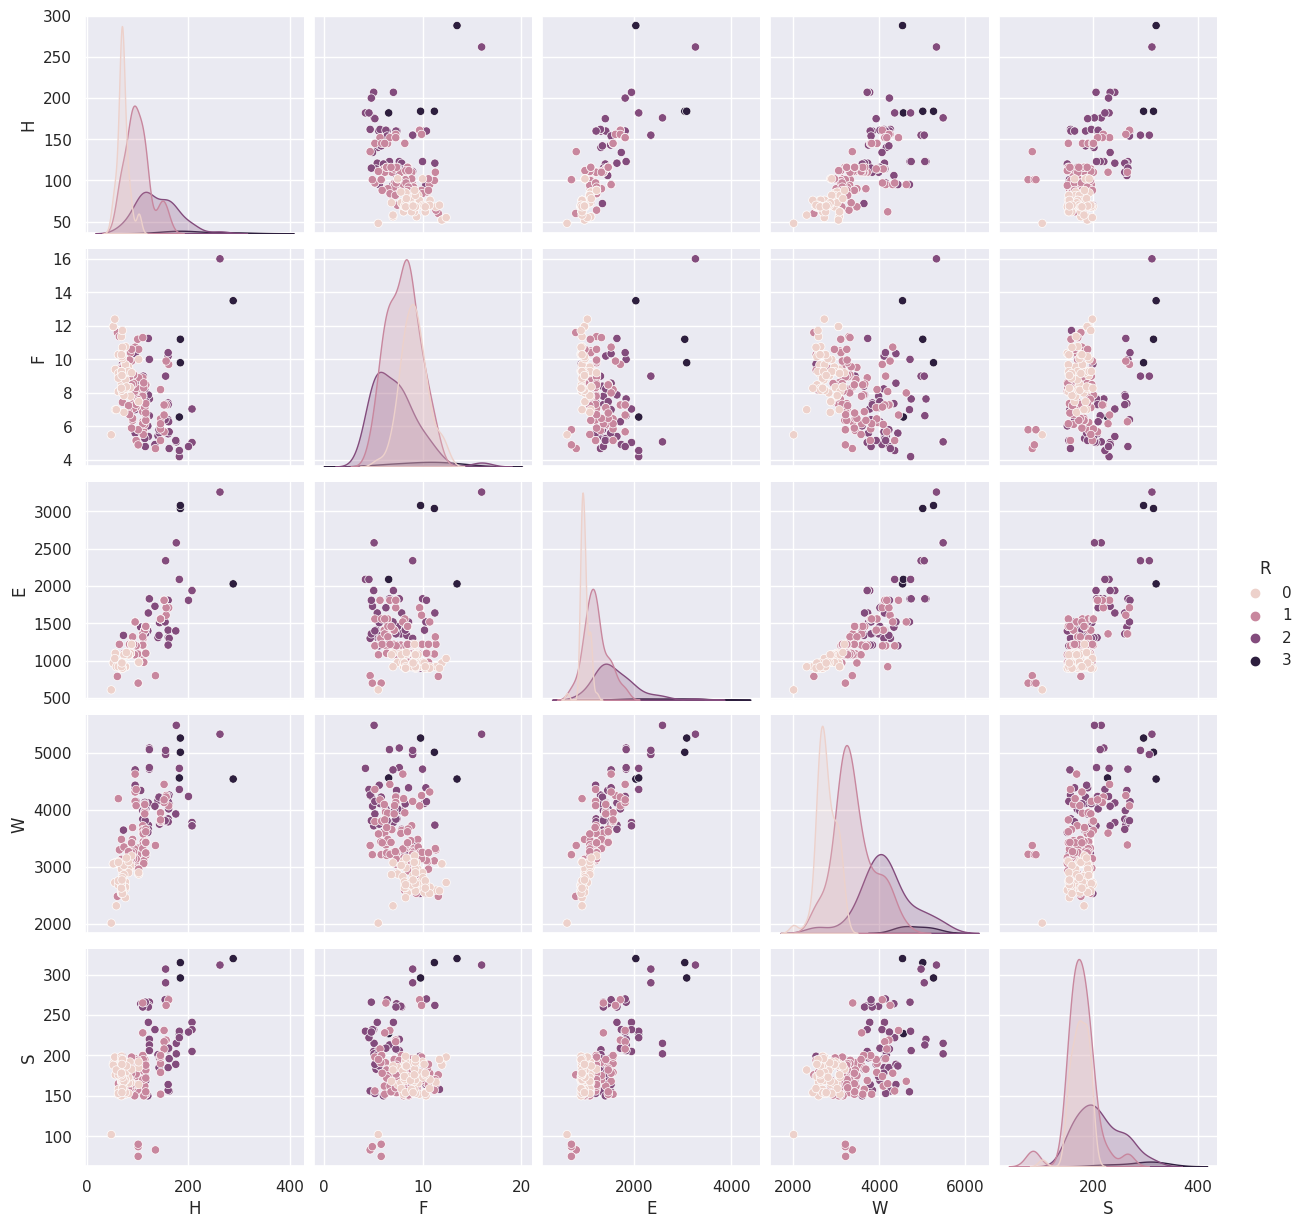

In [9]:
sns.pairplot(df, hue='R')
plt.show()

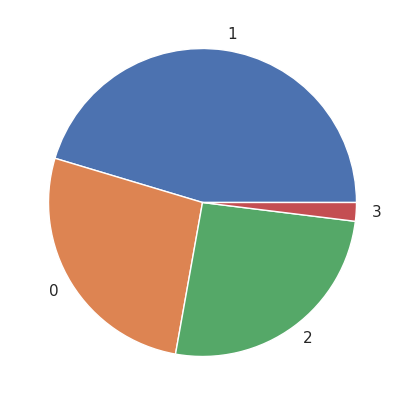

In [10]:
y =df['R']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [11]:
X = df.drop(columns=['R'])
X.head(3)

H      F     E     W    S
0  288  13.50  2030  4544  320
1  184  11.20  3040  5015  315
2  182   6.56  2090  4563  227

In [12]:
X.describe().transpose()

count         mean         std     min     25%      50%      75%     max
H  205.0   104.214634   39.533837    48.0    70.0    95.00   116.00   288.0
F  205.0     8.152976    1.928564     4.2     6.8     8.24     9.32    16.0
E  205.0  1269.073171  416.426934   610.0   970.0  1200.00  1410.00  3260.0
W  205.0  3450.068293  702.940724  2009.0  2896.0  3259.00  3962.00  5489.0
S  205.0   186.214634   38.131516    75.0   164.0   179.00   196.00   320.0

**Standardize the Data**

In [13]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

H         F         E         W         S
0  4.660192  2.779329  1.831749  1.560031  3.517113
1  2.023094  1.583812  4.263082  2.231714  3.385667
2  1.972381 -0.828012  1.976184  1.587127  1.072216
3  2.023094  0.856106  4.359372  2.588233  2.886172
4  2.606299 -0.578513  1.615095  0.470508  1.440265
5  1.972381 -2.054716  1.976184  1.828134  1.151083
6  4.000918  4.078803  4.792679  2.685207  3.306800
7  1.820241 -1.597301  3.155742  2.907675  0.756745
8  1.287750  0.440275  2.578000  2.174671  3.175354
9  1.287750  0.440275  2.578000  2.280201  2.728437

In [14]:
X.describe().transpose()

count          mean       std       min       25%       50%       75%  \
H  205.0 -1.386425e-16  1.002448 -1.425418 -0.867571 -0.233653  0.298838   
F  205.0 -1.039819e-16  1.002448 -2.054716 -0.703263  0.045234  0.606607   
E  205.0  2.426243e-16  1.002448 -1.586561 -0.719947 -0.166277  0.339248   
W  205.0  2.079637e-16  1.002448 -2.055075 -0.790144 -0.272478  0.730054   
S  205.0 -1.386425e-16  1.002448 -2.923746 -0.584006 -0.189667  0.257250   

        max  
H  4.660192  
F  4.078803  
E  4.792679  
W  2.907675  
S  3.517113

**Observations and variables**

In [15]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

<ipython-input-17-3b5aaa5695f7>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


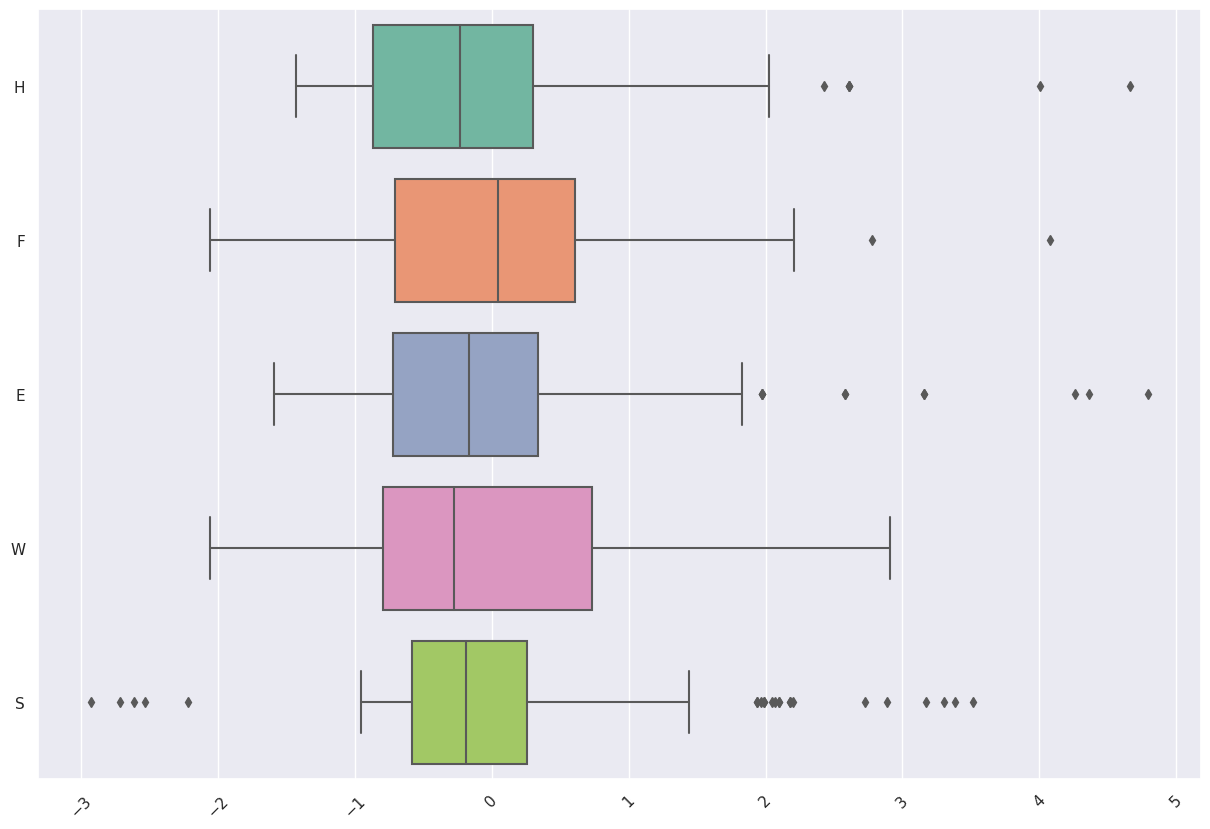

In [17]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="h", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


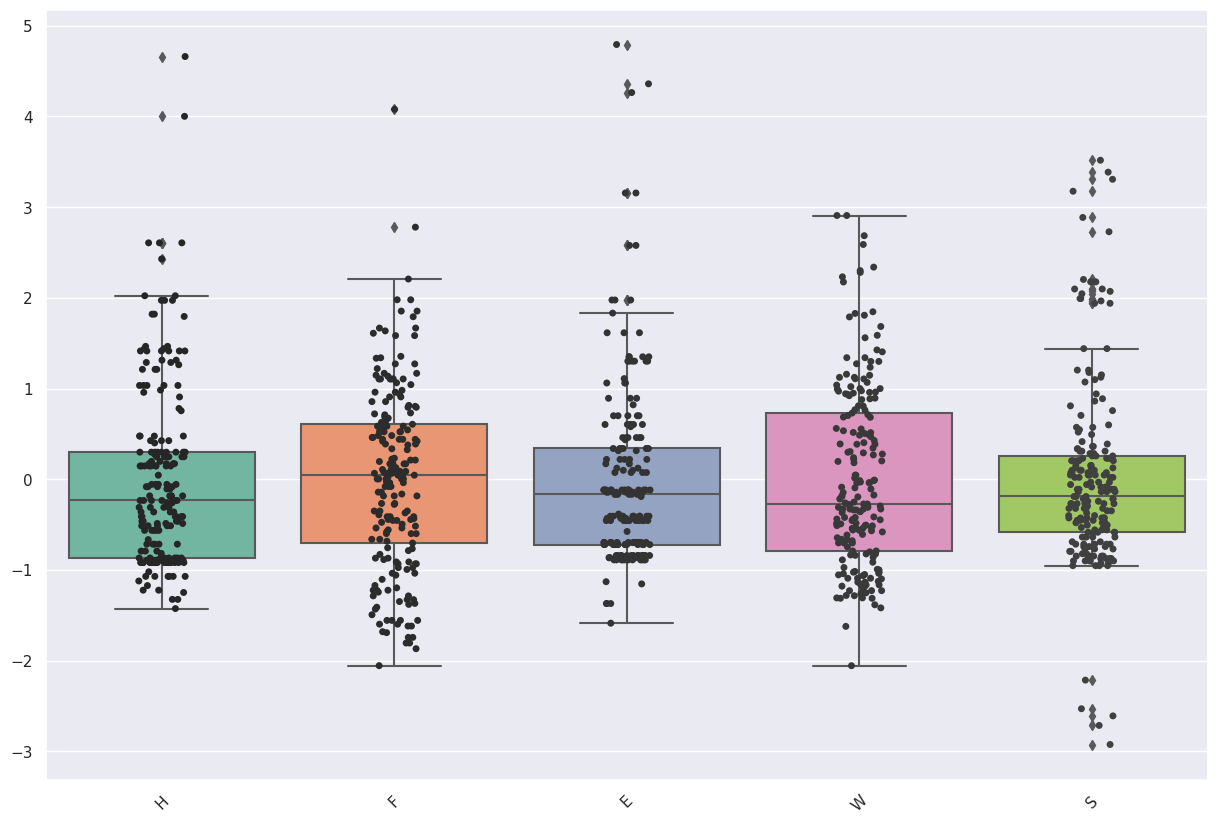

In [18]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

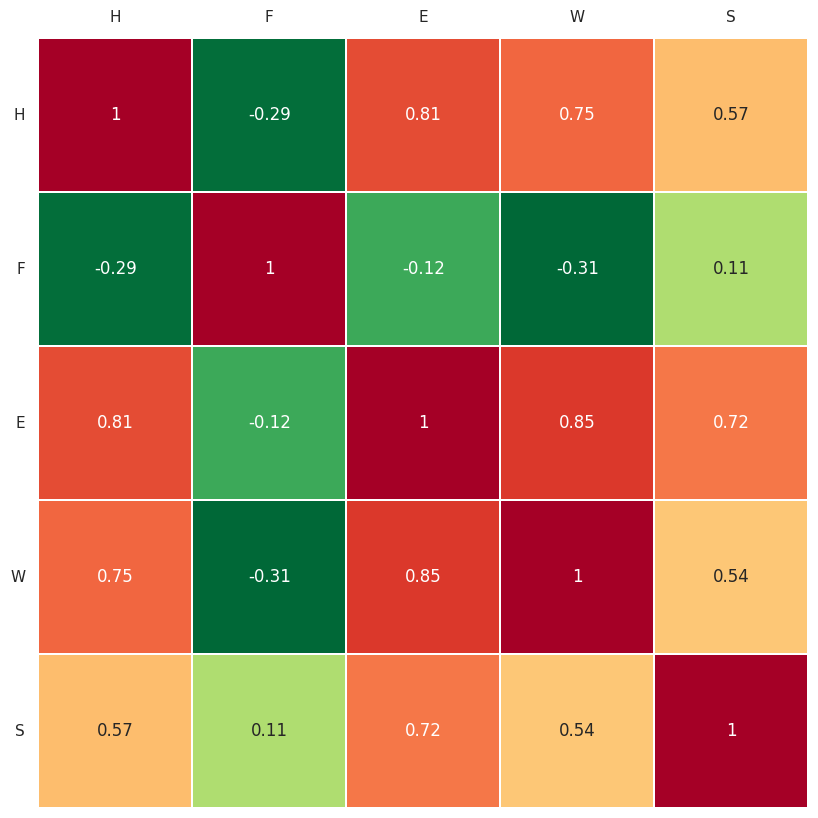

In [19]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

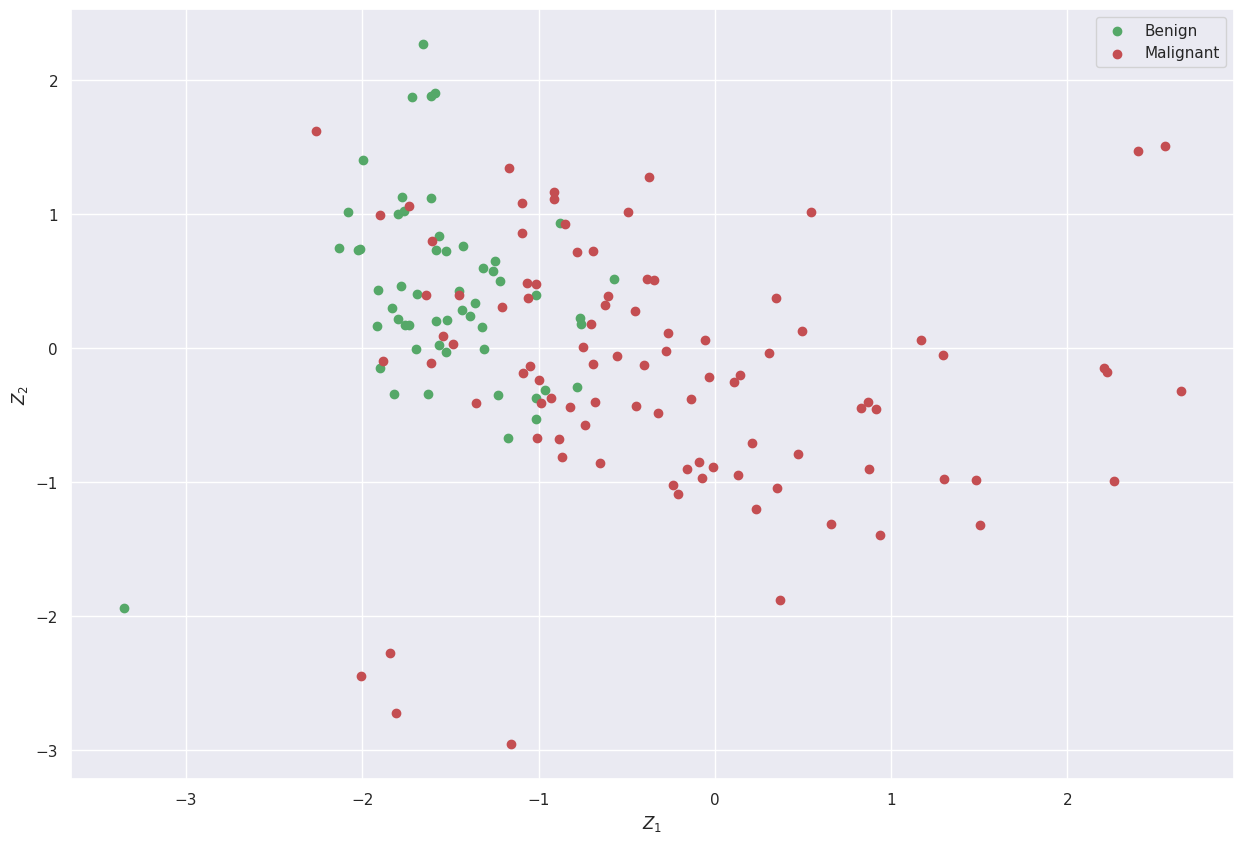

In [20]:
pca = PCA()
Z = pca.fit_transform(X)


idx_Benign= np.where(y == 0)
idx_Malignant = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')
plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

array([[ 0.50397091, -0.10144056, -0.18925749,  0.80276148,  0.23553926],
       [-0.14641269,  0.87900493, -0.43334295,  0.06647454,  0.11708406],
       [ 0.5336027 ,  0.11461209, -0.18543399, -0.1273971 , -0.80716569],
       [ 0.50825884, -0.129235  , -0.38741193, -0.57258191,  0.49702436],
       [ 0.42604901,  0.43269219,  0.76936449, -0.08411348,  0.17961881]])

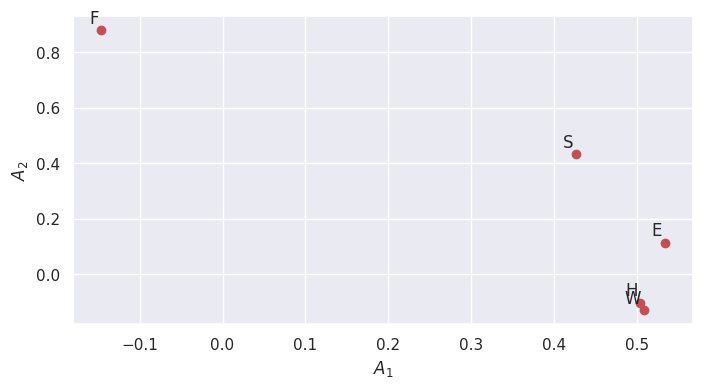

In [21]:
A = pca.components_.T
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  self._transforms = np.empty((0, 3, 3))


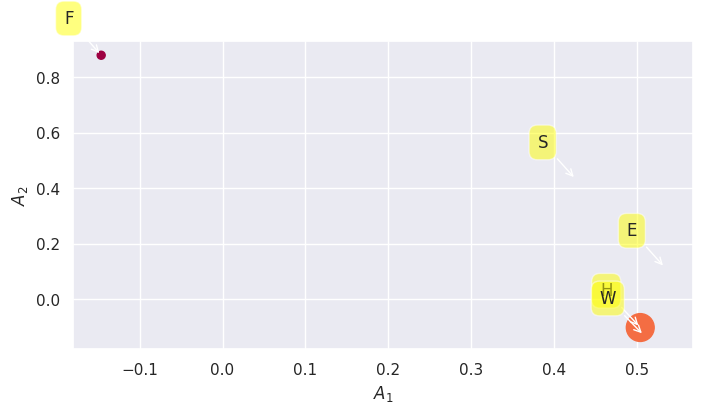

In [22]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([3.19597068, 1.1226571 , 0.35415545, 0.25370185, 0.09802473])

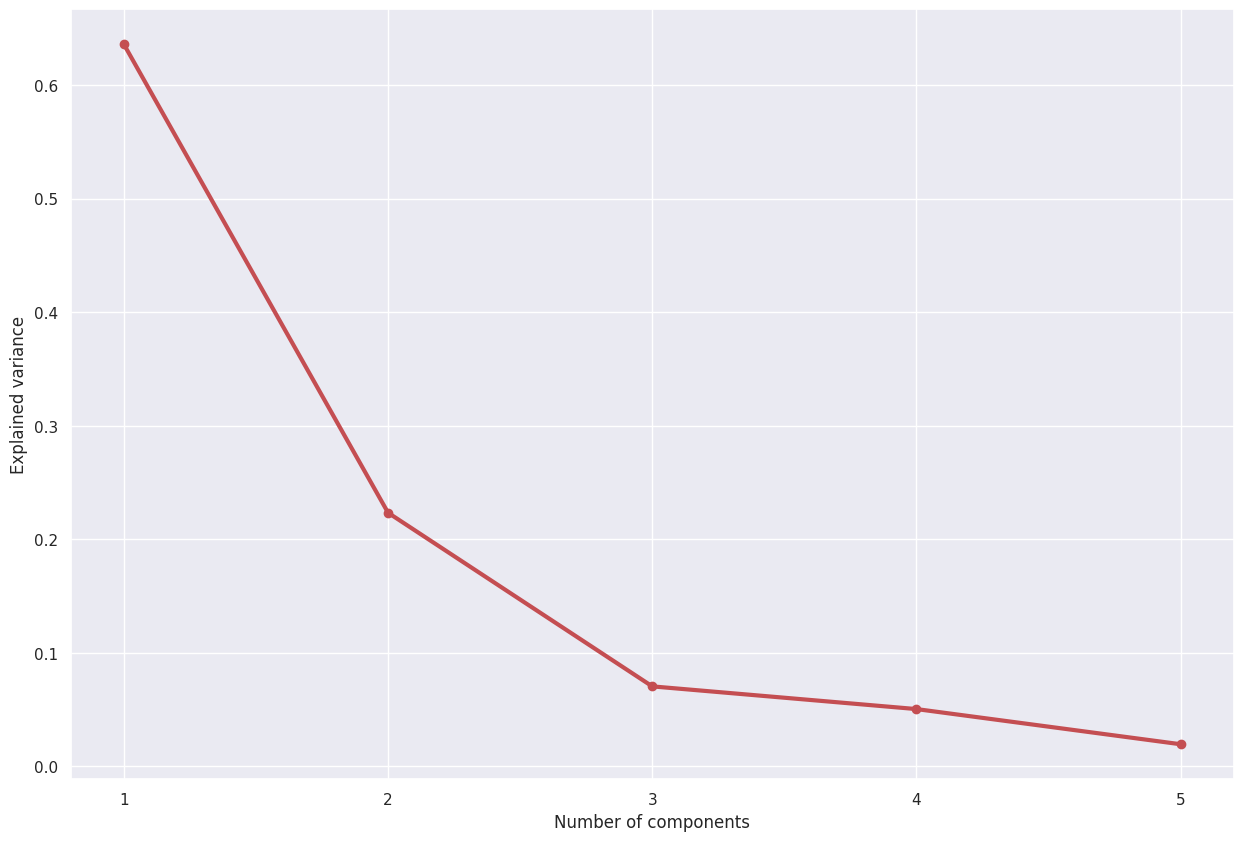

In [23]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

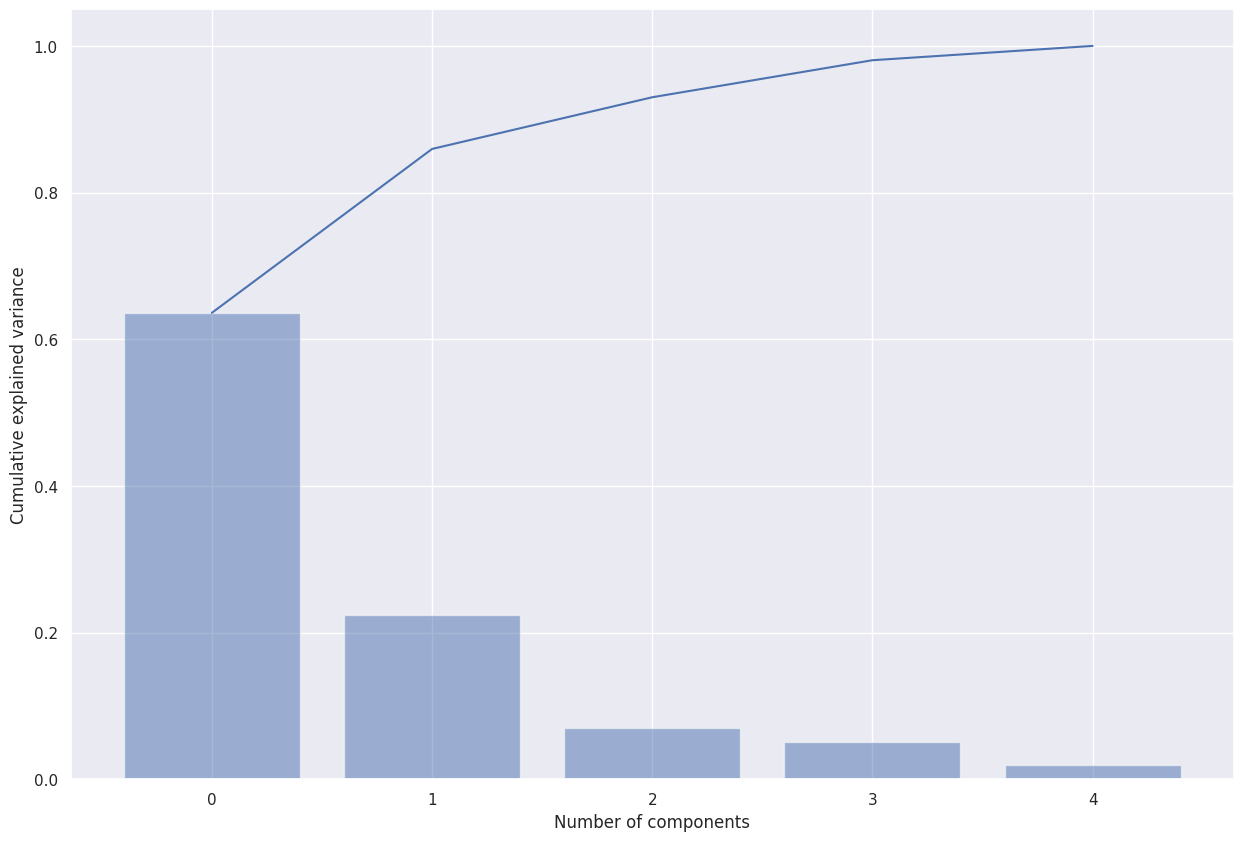

In [24]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

array([ 3.50046848,  2.8520918 , -0.4425848 ,  1.96126849, -0.0254058 ,
       -1.51788466,  4.81253529, -1.27533145,  1.64475052,  1.43773497,
       -1.3378328 , -1.204324  , -1.03070397, -1.4232083 , -0.04586142,
       -1.37602762, -0.5774091 ,  1.62423313, -0.1415302 , -0.69967829,
       -1.28406777, -1.46155912,  0.40326986, -1.13233263, -1.01928363,
        2.2841126 ,  0.73525497, -1.28762926,  0.69412443, -2.22023156,
        0.60048575,  1.01715222, -0.90855986, -1.28049894, -0.28137488,
        0.14280346, -1.41496344, -1.27624808, -1.30951216,  1.45590488,
        0.14649469,  0.38812229, -0.58523806, -0.6937562 ,  1.85722253,
       -1.02021284, -0.33057611,  0.66625621, -0.69578293, -1.33439276,
       -1.87498605, -0.72565196, -0.16104136, -1.57001781,  0.1954948 ,
        0.01541839,  0.12442957,  1.50949478, -0.90023667,  1.47297678,
       -0.1806603 , -2.95564479,  0.37377688,  0.06401433,  0.06281838,
       -0.97132909,  1.61907958, -0.97564115, -0.05223359, -0.32

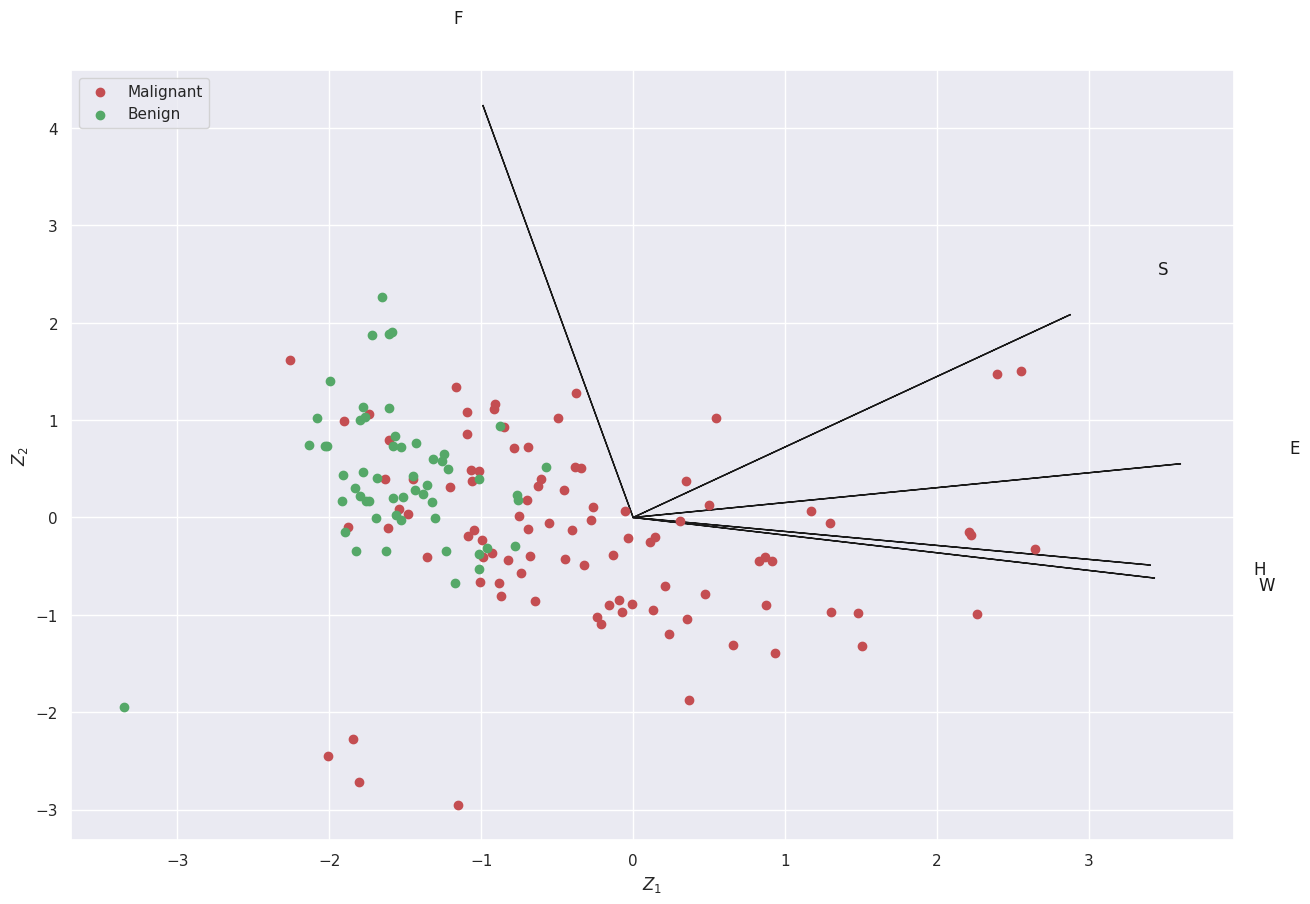

In [25]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')

plt.legend(loc='upper left')
Z1
Z2

# **Using PCA Library**

In [26]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.4 MB/s eta 0:00:00


In [27]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [28]:
out['PC']

PC1       PC2       PC3       PC4
0    5.210461  3.500468 -0.324480  2.503335
1    5.639231  2.852092 -0.119520 -0.376378
2    3.433239 -0.442585 -0.170874  0.277602
3    5.765552  1.961268 -0.344443 -0.599142
4    3.112783 -0.025406  0.383748  1.457471
..        ...       ...       ...       ...
200 -2.026271  0.734571 -0.407934 -0.036929
201 -1.608104  1.122635  0.404025  0.173048
202 -2.078371  1.019044 -0.291395  0.316890
203 -1.763811  1.027475  0.140744  0.136072
204 -1.756875  0.172602 -0.172048  0.033737

[205 rows x 4 columns]

**Scatter plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (63.6% expl.var)', ylabel='PC2 (22.3% expl.var)'>)

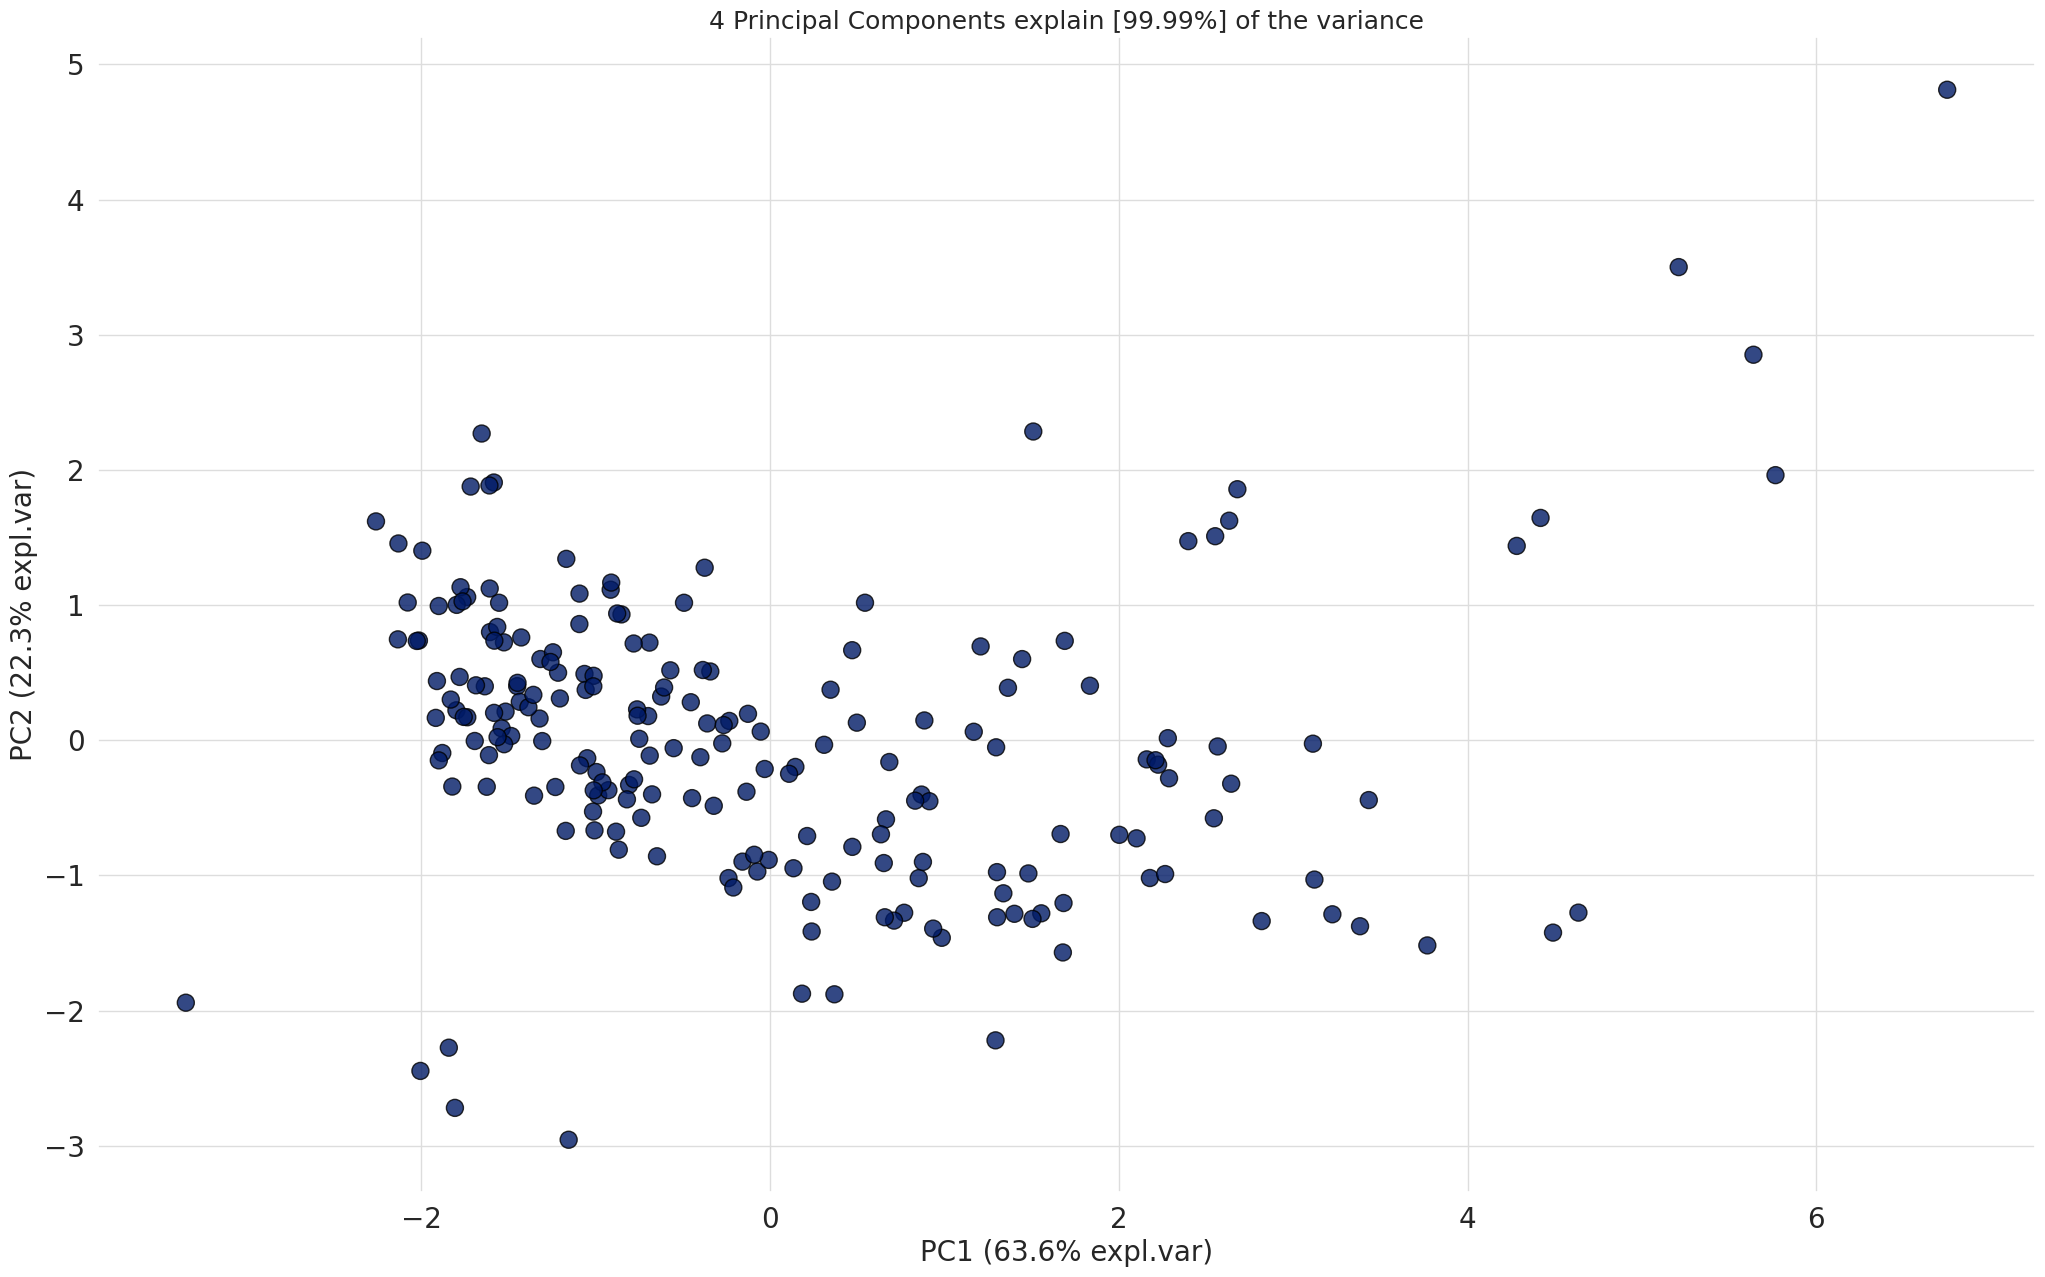

In [29]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [30]:
A = out['loadings'].T
A

PC1       PC2       PC3       PC4
H  0.503971 -0.101441 -0.189257  0.802761
F -0.146413  0.879005 -0.433343  0.066475
E  0.533603  0.114612 -0.185434 -0.127397
W  0.508259 -0.129235 -0.387412 -0.572582
S  0.426049  0.432692  0.769364 -0.084113

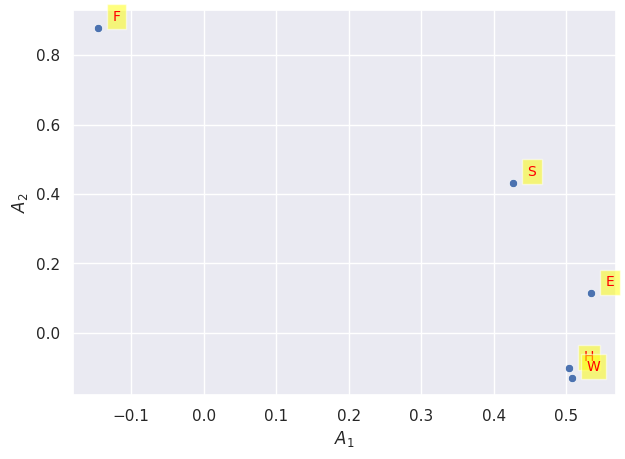

In [31]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))


**Scree Plot**

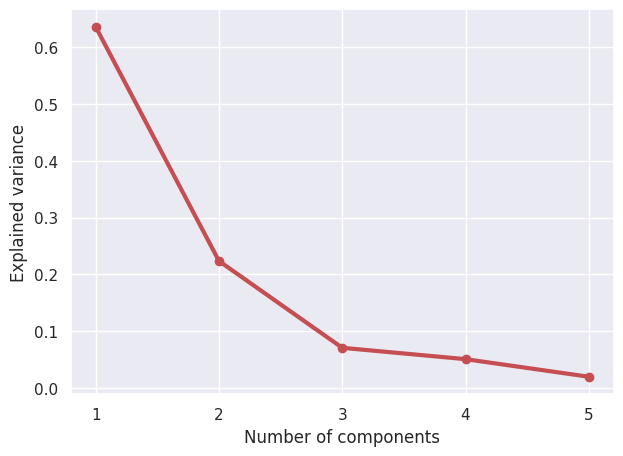

In [32]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

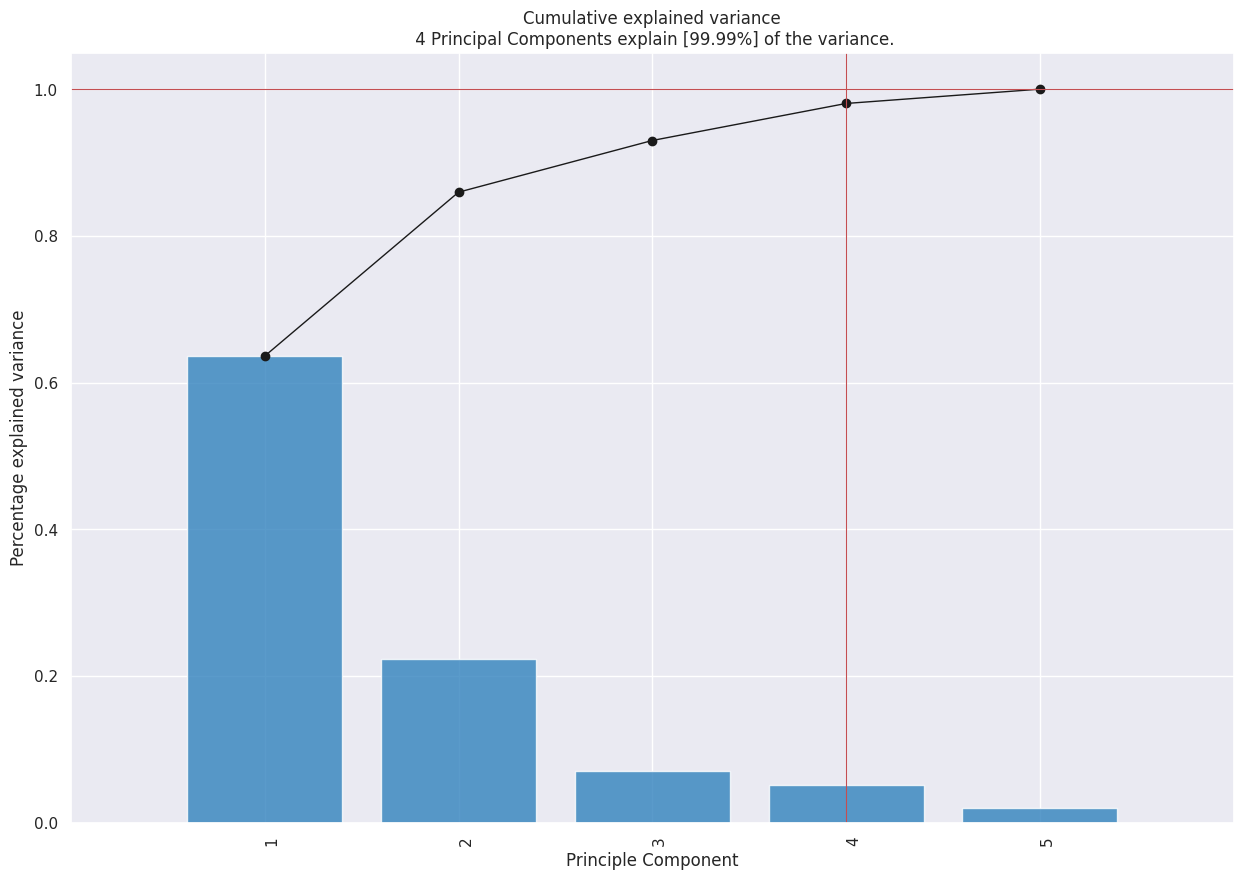

In [33]:
model.plot();

**Biplot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (63.6% expl.var)', ylabel='PC2 (22.3% expl.var)'>)

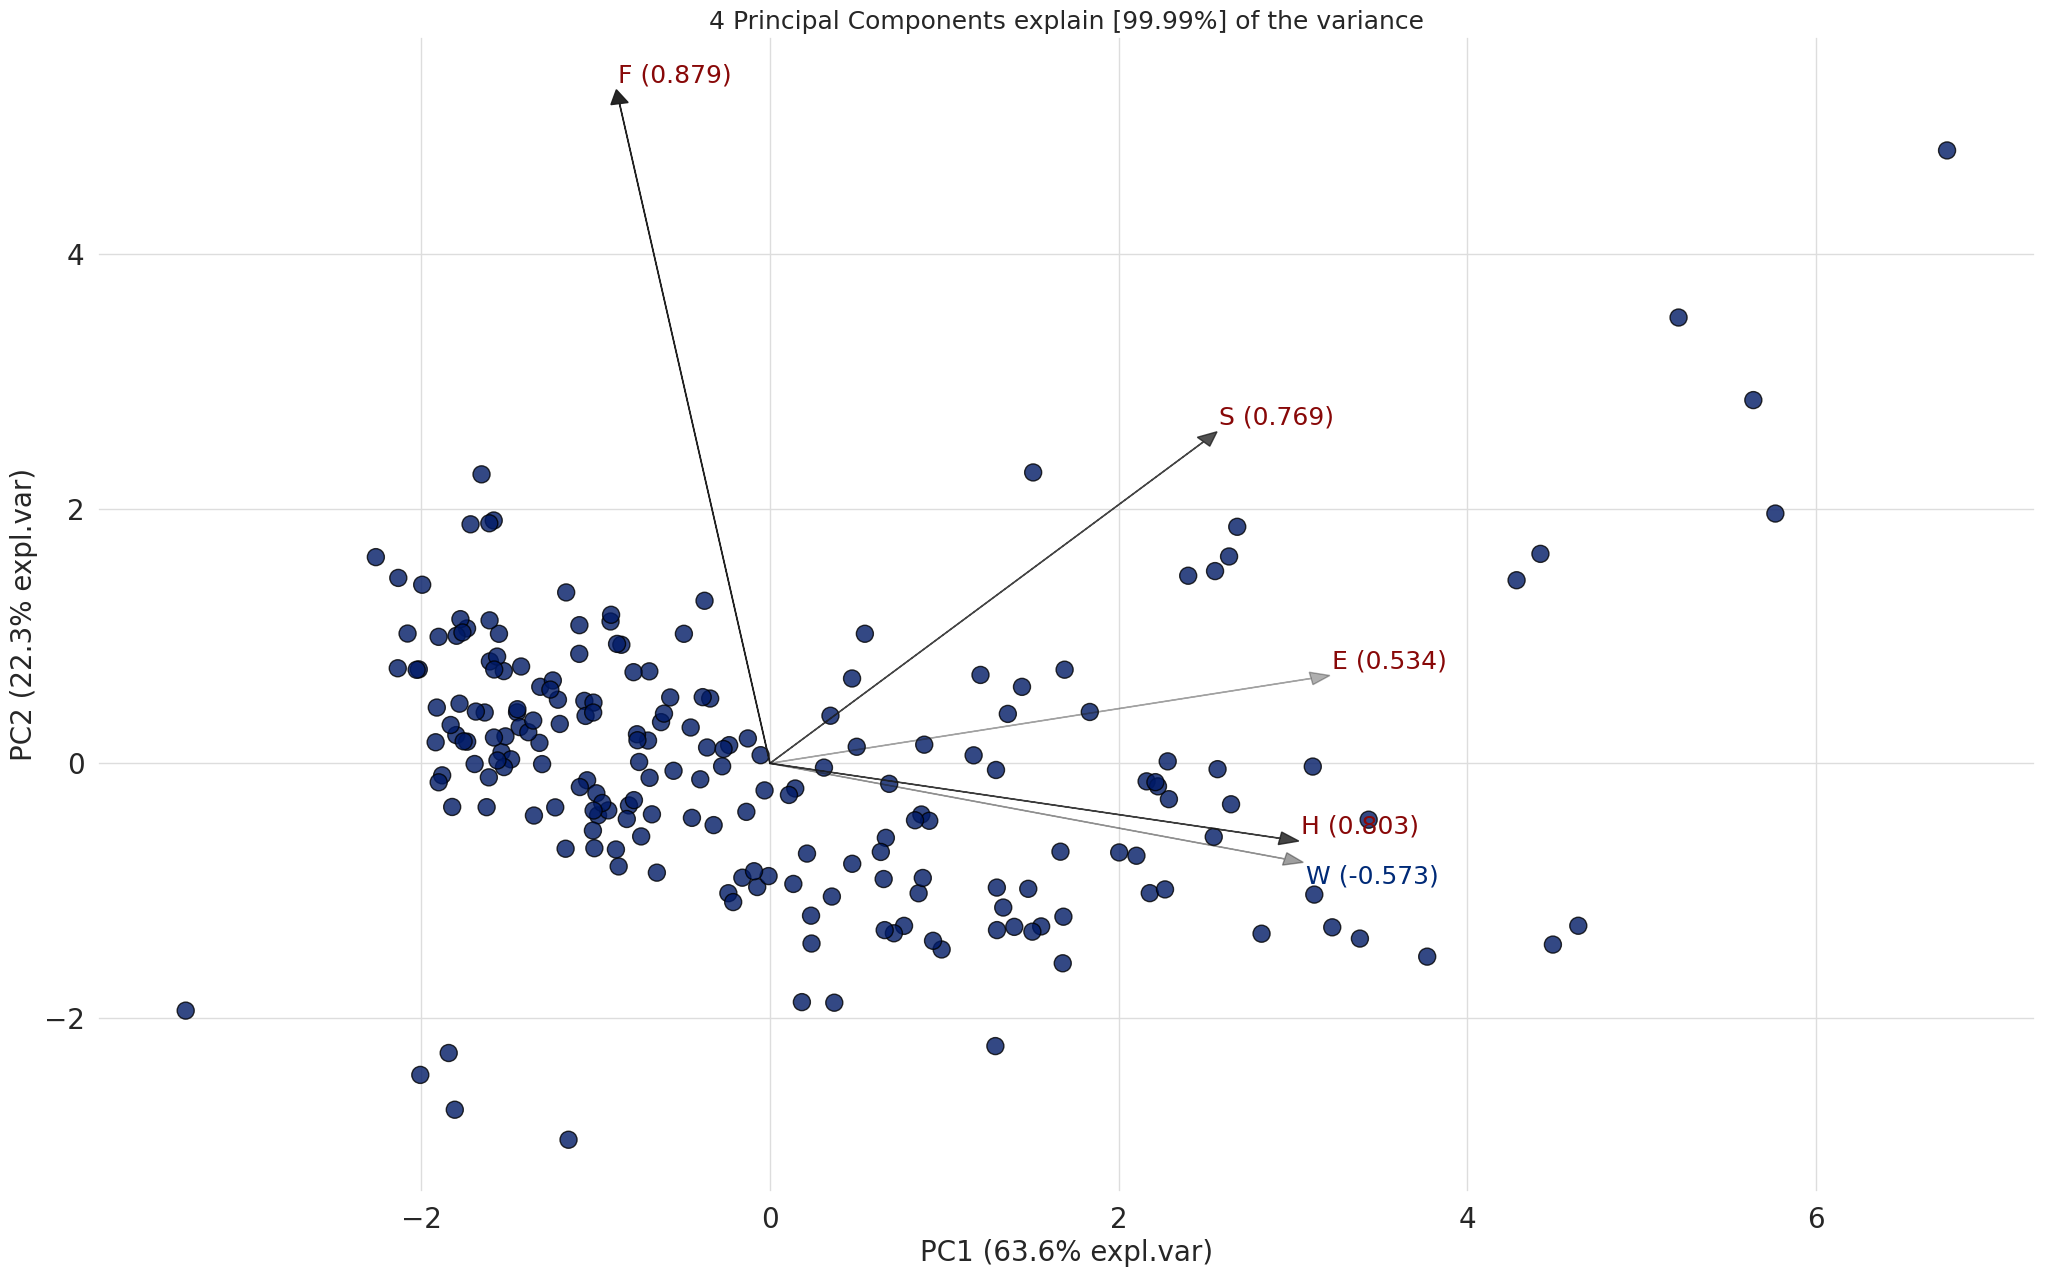

In [34]:
model.biplot(label=False, legend=False, color_arrow='k')

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '4 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (63.6% expl.var)', ylabel='PC2 (22.3% expl.var)', zlabel='PC3 (7.04% expl.var)'>)

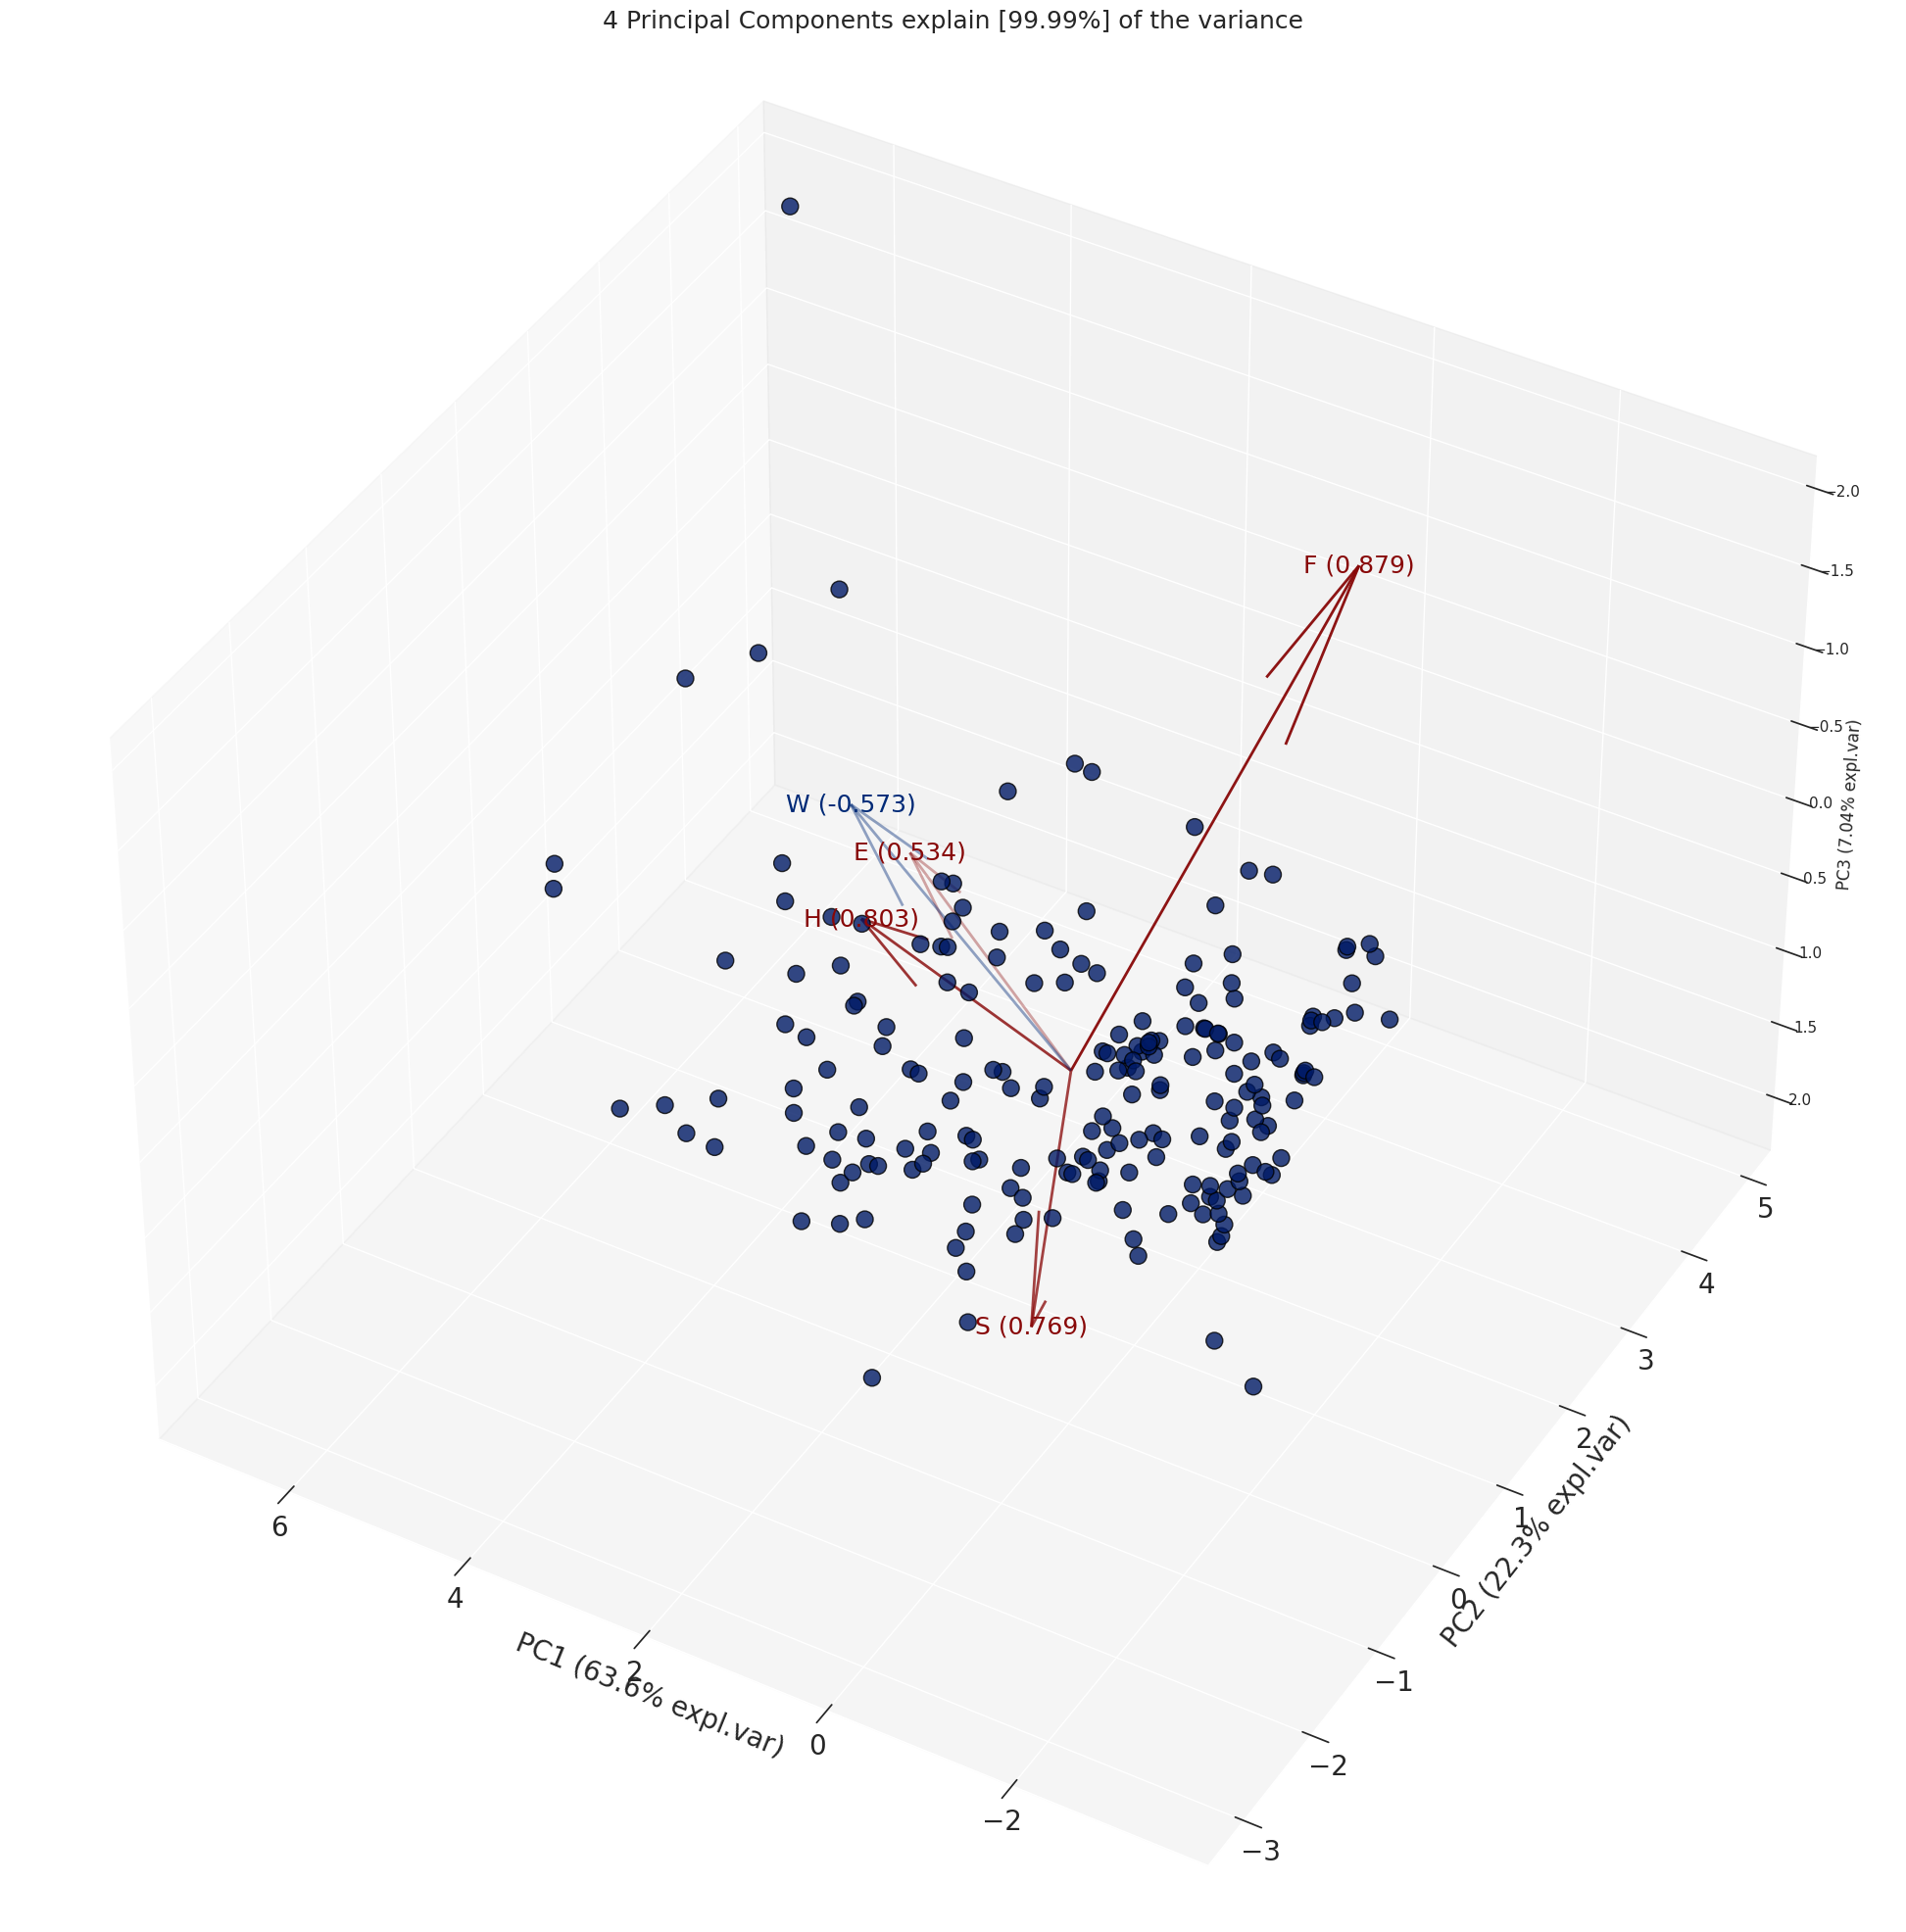

In [35]:
model.biplot3d(legend=False)

# Classification using Pycaret
At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found.
Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

 However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [36]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.2.0'

In [37]:
#For Google Colab only
#from pycaret.utils import enable_colab
#enable_colab()

In [38]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (184, 6)
Unseen Data For Predictions: (21, 6)


In [39]:
from pycaret.classification import *
clf = setup(data=data, target='R', train_size=0.7, session_id=123)

**Comparing All Models**

In [40]:
#show the best model and their statistics
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [41]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

 Create a Model

**Logistic Regresssion**

In [42]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune the model**

In [43]:
tuned_lr=tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [44]:
tuned_lr

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate Logistic Regression**


In [45]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create model with K-nearest neighbour**

In [46]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune model with K-nearest neighbour**

In [47]:
tuned_knn = tune_model(knn)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [48]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')

**Evaluate model with K-nearest neighbour**

In [49]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create model with Quadratic Discriminant Analysis**

In [50]:
qda=create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune QDA Model**

In [51]:
tuned_qda=tune_model(qda)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate QDA Model**

In [52]:
tuned_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [53]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [54]:
!pip install statsmodels --upgrade

# **Classification + PCA**

In [55]:
clf_pca = setup(data=data, target='R', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

# **Comparing Models**

In [56]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# **Best model with PCA**

In [57]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# **Tune Best Model**

In [58]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# **Evaluate Best Model**

In [59]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [60]:
lr_pca = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune Model**

In [61]:
tuned_lr_pca = tune_model(lr_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# **Evaluate Model**

In [62]:
tuned_lr_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Create K-nearest neighbour Model**

In [63]:
knn_pca = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune Model**

In [64]:
tuned_knn_pca = tune_model(knn_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [68]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=12, p=2,
                     weights='distance')

# **Evaluate Model KNN**

In [69]:
evaluate_model(tuned_knn_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Create Quadratic Discriminant Analysis Model**

In [70]:
qda_pca = create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune model**

In [71]:
tuned_qda_pca = tune_model(qda_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


# **Evaluate Model**

In [72]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.83,
                              store_covariance=False, tol=0.0001)

In [73]:
evaluate_model(tuned_qda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Explainable AI with Shapley values
For binary classification, AI shapley can only support tree based classification models. As none of the the best three models with highest accuracy (LR, KNN, QDA) based on tree, I chose the fourth best model "Extra trees classifier" for the AI Shapley analysis.

In [74]:
et_pca = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [81]:
tuned_et_pca = tune_model(et_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [82]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [83]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [79]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 9.6 MB/s eta 0:00:00


In [ ]:
import shap

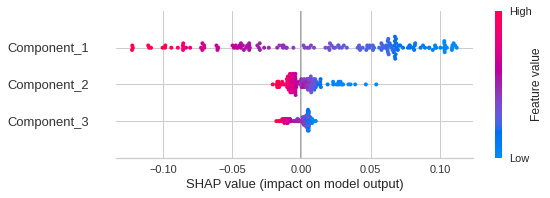

In [ ]:
interpret_model(tuned_et_pca, plot='summary')


In [ ]:
interpret_model(tuned_et_pca, plot='reason', observation=32)

In [ ]:
interpret_model(tuned_et_pca, plot='reason')